# Classification Hands-on Notebook

by Umberto Michelucci (umberto.michelucci@toelt.ai). 

In [29]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
from sklearn import metrics

import sklearn as sk

## Data

In [11]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
X = iris["data"][:,3:]  # petal width
y = (iris["target"]==2).astype(np.int)

In [14]:
log_reg = LogisticRegression(penalty="l2")
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
score = log_reg.score(X, y)
print(score)

0.96


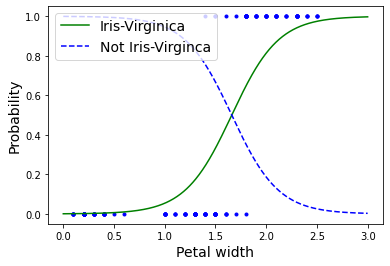

array([1, 0])

In [16]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

log_reg.predict([[1.7],[1.5]])

In [17]:
X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=5)
softmax_reg.fit(X,y)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
score = softmax_reg.score(X, y)
print(score)

0.96


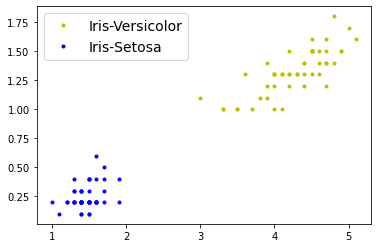

In [19]:
X_new = np.linspace(0,3,1000).reshape(-1,2)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")

plt.legend(loc="upper left", fontsize=14)

plt.show()

In [23]:
predictions = softmax_reg.predict(X)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


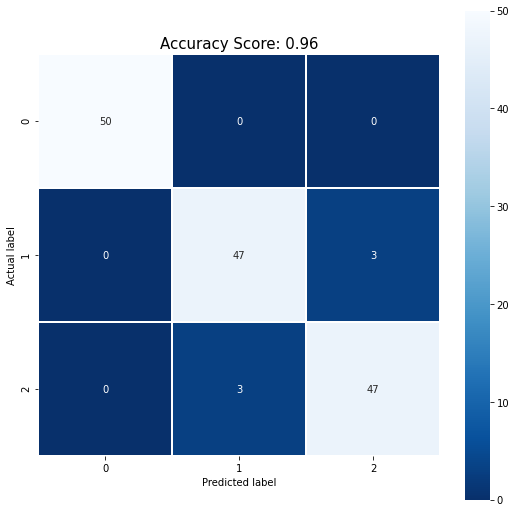

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Naïve Bayes

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [38]:
gnb = GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)

In [39]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))

Number of mislabeled points out of a total 75 points : 4


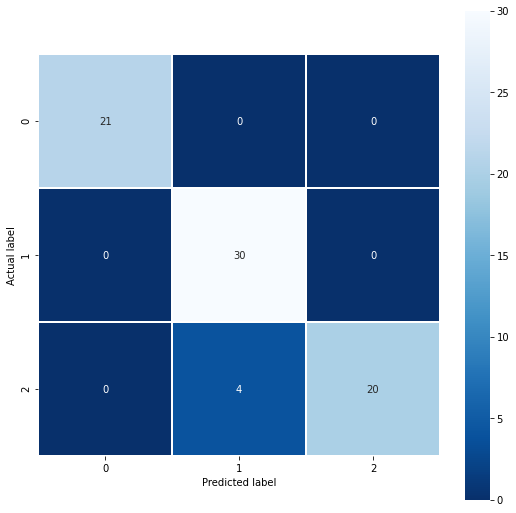

In [43]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Neural Networks

Check

https://colab.research.google.com/drive/1Y-JRhDt199QkMWPVtYhIy2YHI3k90a53?usp=sharing

## k-Means

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 4 4 4 4 2 2 4 4 2 2 2 2 2 4 2 2 3 1 3 1 1 3 4 3 1 3 1
 1 1 1 1 1 1 3 3 4 1 1 3 4 1 3 4 4 1 1 3 3 1 4 1 3 1 1 4 1 1 1 1 3 1 1 1 1
 1 1]


In [46]:
kmeans5.cluster_centers_

array([[1.462     , 0.246     ],
       [5.39666667, 2.05333333],
       [3.83181818, 1.16818182],
       [6.28461538, 2.13846154],
       [4.64857143, 1.5       ]])

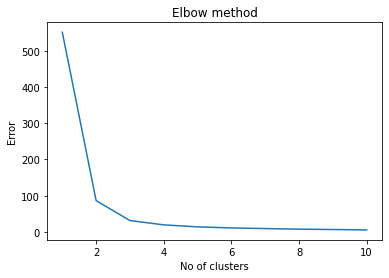

In [50]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [52]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(X)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


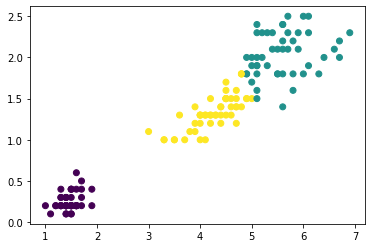

In [66]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans3)

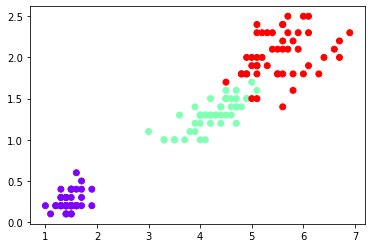

In [62]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'rainbow')